# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys
api_key = "91425408dfa4a4ee99c92d03dc1fa412"


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [44]:
x="https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="+api_key
count=1
#city_url=x+"&q="+cities[0]
#print(city_url)

lat=[]
temp=[]
wind=[]
humidity=[]
clouds=[]

for city in cities:
    city_url=x+"&q="+city
    print(city+" "+str(count))
    count=count+1
    city_weather = requests.get(city_url).json()
    try:
        lat.append(city_weather['coord']['lat'])
        temp.append(city_weather['main']['temp'])
        humidity.append(city_weather['main']['humidity'])
        clouds.append(city_weather['clouds']['all'])
        wind.append(city_weather['wind']['speed'])
    except KeyError:
        pass 

    

port alfred 1
onguday 2
qaanaaq 3
kapaa 4
avera 5
khatanga 6
bluff 7
nioro 8
troitsk 9
cockburn town 10
punta arenas 11
acapulco 12
pisco 13
rikitea 14
aksarka 15
necochea 16
cape town 17
dikson 18
mahon 19
muros 20
chaihe 21
touros 22
ushuaia 23
hobart 24
viru 25
saskylakh 26
mount gambier 27
namatanai 28
mys shmidta 29
albany 30
camacha 31
san quintin 32
hermanus 33
butaritari 34
kodiak 35
kloulklubed 36
upernavik 37
faanui 38
yellowknife 39
balkhash 40
jamestown 41
gongzhuling 42
arraial do cabo 43
zhovkva 44
torbay 45
tuktoyaktuk 46
klaksvik 47
vaitape 48
busselton 49
hualmay 50
tiksi 51
asfi 52
wanxian 53
bloomfield 54
chuy 55
douentza 56
cuencame 57
ayia marina 58
port lincoln 59
marawi 60
urengoy 61
atuona 62
sosua 63
mar del plata 64
mataura 65
scottsbluff 66
lebu 67
pacifica 68
pevek 69
codrington 70
ushtobe 71
kuche 72
vostok 73
labutta 74
fortuna 75
bredasdorp 76
vaini 77
piastow 78
bako 79
peniche 80
bengkulu 81
grand river south east 82
boras 83
ketchikan 84
puerto ayora 8

In [45]:
print(temp)

[61.56, -5.45, -26.15, 75.58, 59.49, -11.34, 92.34, 63.14, 16.25, 78.39, 48.2, 78.8, 69.8, 80.15, -13.86, 63.05, 59, 6.62, 42.8, 44.6, 3.92, 78.8, 46.4, 80.6, 26.6, -22.1, 78.8, 80.64, 18.21, 60.8, 79.83, 45.09, 83.48, 8.17, 84.2, -9.41, 83.79, -4.01, 10.4, 70.56, 13.01, 76.91, 23, 14, -5.81, 39.2, 81.68, 82.26, 66.38, -45.09, 39.56, 2.43, 65.21, 53.64, 35.06, 44.13, 73.71, 70.07, -5.31, 78.8, 72.66, 76.28, 55.31, 38.14, 35.06, 58.95, -22.46, 87.73, 10.85, 1.98, 50, 50, 71.58, 21.11, 67.41, 53.6, 30.88, 40.66, 77.27, 24.8, 77, 77.76, 61.97, 53.6, 75.2, 61.7, 54.45, -19.49, 77, -3.2, 48.06, 23, 67.46, 70.83, 70.83, 41.02, 82.4, 68.9, 50.95, 79.38, -2.21, 102.11, 1.76, 84.2, 13.41, 23, 61.34, 77, 66.2, -32.81, 1.4, 73.94, 43.54, 17.06, 48.56, 17.96, 28.83, 62.6, 80.6, 39.69, 17.6, 67.59, 90.32, 66.78, 20.32, 24.44, 76.37, 48.2, 32.72, 75.83, -42.62, 35.33, -12.65, 28.47, -22.01, -8.51, 42.8, 86.5, 75.33, 75.02, 31.37, 75.65, 80.42, 70.34, 71.64, 40.82, -32.81, 21.2, 69.98, 56.97, 12.2, 4

In [46]:
print(city_url)

https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=91425408dfa4a4ee99c92d03dc1fa412&q=hwange


In [47]:
print(city_weather)
city_weather['coord']['lat']
city_weather['main']['temp']
city_weather['main']['humidity']
city_weather['clouds']['all']
city_weather['wind']['speed']


{'coord': {'lon': 26.5, 'lat': -18.35}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 69.33, 'pressure': 920.84, 'humidity': 95, 'temp_min': 69.33, 'temp_max': 69.33, 'sea_level': 1026.23, 'grnd_level': 920.84}, 'wind': {'speed': 9.75, 'deg': 98.502}, 'rain': {'3h': 1.65}, 'clouds': {'all': 88}, 'dt': 1547958830, 'sys': {'message': 0.0036, 'country': 'ZW', 'sunrise': 1547956389, 'sunset': 1548003396}, 'id': 889942, 'name': 'Hwange', 'cod': 200}


9.75

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [48]:
print(len(cities[:19]))
print(len(lat))
print(len(humidity))
print(len(temp))
print(len(wind))
print(len(clouds))

19
562
562
562
562
562


In [28]:
s={'city':cities,'latitude':lat, 'temp':temp, 'humidity':humidity, 'clouds':clouds, 'wind': wind}
df = pd.DataFrame.from_dict(s)
df.head()

,city,latitude,temp,humidity,clouds,wind
0,port alfred,-33.59,61.56,100,92,5.61
1,onguday,50.75,-5.45,60,76,1.92
2,qaanaaq,77.48,-26.15,100,0,11.77
3,kapaa,22.08,78.19,68,1,12.75
4,avera,33.19,61.38,93,90,5.82


In [30]:
df.to_csv(output_data_file)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

Text(0.5,1,'Latitude vs. Temperature')

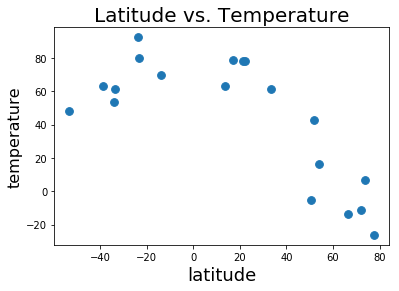

In [40]:
plt.scatter(lat,temp, s=60)
plt.xlabel('latitude', fontsize=18)
plt.ylabel('temperature', fontsize=16)
plt.title('Latitude vs. Temperature', fontsize=20)

#### Latitude vs. Humidity Plot

Text(0.5,1,'Latitude vs. humidity')

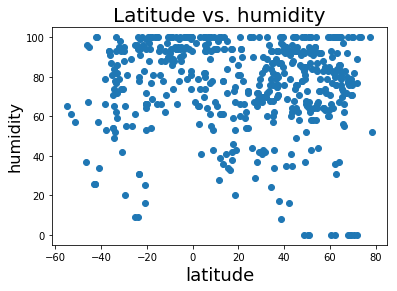

In [9]:
plt.scatter(lat,humidity)
plt.xlabel('latitude', fontsize=18)
plt.ylabel('humidity', fontsize=16)
plt.title('Latitude vs. humidity', fontsize=20)

#### Latitude vs. Cloudiness Plot

Text(0.5,1,'Latitude vs. clouds')

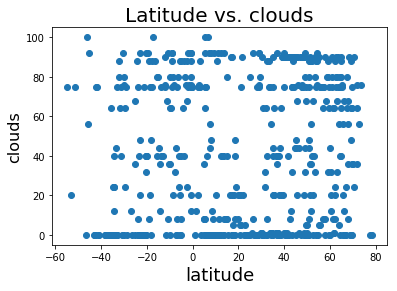

In [11]:
plt.scatter(lat,clouds)
plt.xlabel('latitude', fontsize=18)
plt.ylabel('clouds', fontsize=16)
plt.title('Latitude vs. clouds', fontsize=20)

#### Latitude vs. Wind Speed Plot

Text(0.5,1,'Latitude vs. Wind')

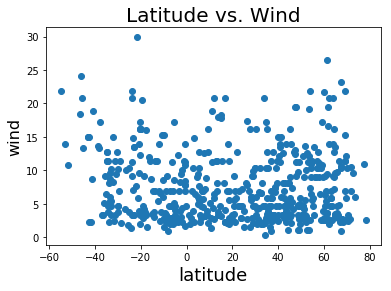

In [12]:
plt.scatter(lat,wind)
plt.xlabel('latitude', fontsize=18)
plt.ylabel('wind', fontsize=16)
plt.title('Latitude vs. Wind', fontsize=20)